## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectPercentile, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

## Reading the dataset

In [2]:
df = pd.read_csv("cardio_data_processed.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


## Statistical Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

* ID: Unique identifier for each patient.
* age: Age of the patient in days.
* age_years: Age of the patient in years (derived from age).
* gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
* smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
* alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
* active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
* cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
* bmi: Body Mass Index, derived from weight and height. Calculated as BMI = weight (kg) / height (m)^2
* bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
* bp_category_encoded: Encoded form of bp_category for machine learning purposes.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68205.0,49972.410498,28852.138290,0.000000,24991.000000,50008.000000,74878.000000,99999.000000
age,68205.0,19462.667737,2468.381854,10798.000000,17656.000000,19700.000000,21323.000000,23713.000000
gender,68205.0,1.348625,0.476539,1.000000,1.000000,1.000000,2.000000,2.000000
height,68205.0,164.372861,8.176756,55.000000,159.000000,165.000000,170.000000,250.000000
weight,68205.0,74.100688,14.288862,11.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,68205.0,126.434924,15.961685,90.000000,120.000000,120.000000,140.000000,180.000000
ap_lo,68205.0,81.263925,9.143985,60.000000,80.000000,80.000000,90.000000,120.000000
cholesterol,68205.0,1.363243,0.678080,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,68205.0,1.225174,0.571288,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,68205.0,0.087662,0.282805,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum().sum()

0

In [7]:
df['bp_category'].value_counts().unique

<bound method Series.unique of bp_category
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64>

<AxesSubplot:ylabel='bp_category'>

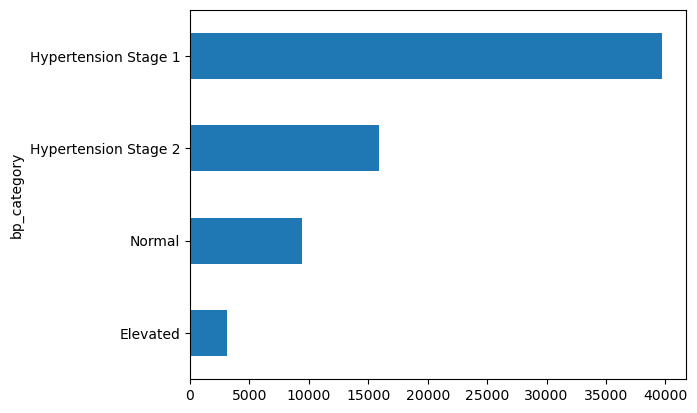

In [8]:
df['bp_category'].value_counts().sort_values().plot(kind = 'barh')

In [9]:
df['bp_category_encoded'].value_counts().unique

<bound method Series.unique of bp_category_encoded
Hypertension Stage 1    39750
Hypertension Stage 2    15937
Normal                   9417
Elevated                 3101
Name: count, dtype: int64>

<AxesSubplot:ylabel='bp_category_encoded'>

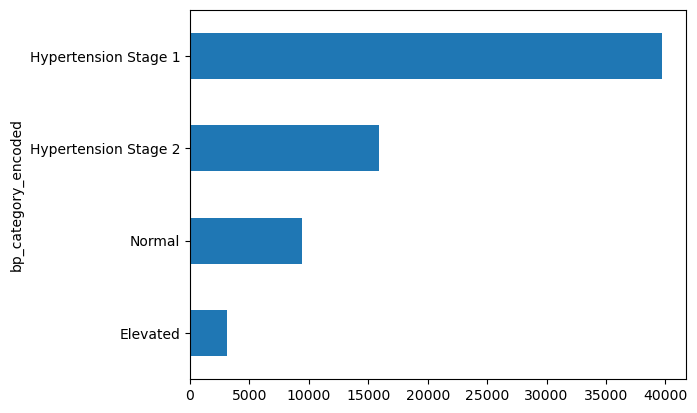

In [10]:
df['bp_category_encoded'].value_counts().sort_values().plot(kind = 'barh', )

In [11]:
df['cardio'].value_counts().unique

<bound method Series.unique of cardio
0    34533
1    33672
Name: count, dtype: int64>

<AxesSubplot:ylabel='cardio'>

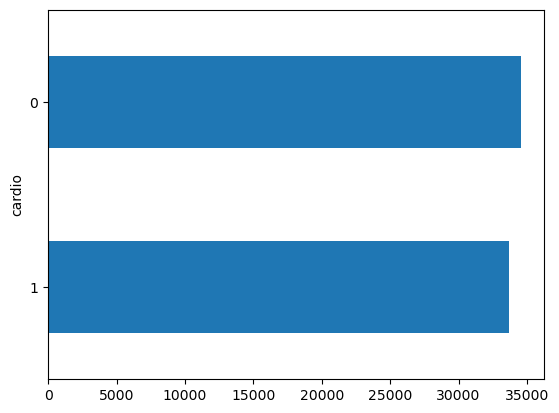

In [12]:
df['cardio'].value_counts().sort_values().plot(kind = 'barh', )

There is an imbalance in the classes. We can experiment with using Synthetic Minority Oversampling Technique (SMOTE) to solve this imbalance.

In [13]:
pd.Series(df['bp_category'] == df['bp_category_encoded']).value_counts()

True    68205
Name: count, dtype: int64

In [14]:
df['age_years'] = df['age'] / 365
df = df.drop(['id', 'age', 'bp_category_encoded'], axis = 1)

In [15]:
LE = LabelEncoder()
Encoded_labels = LE.fit_transform(df['bp_category'])
df['bp_category_encoded'] = Encoded_labels 

In [16]:
bp_types = LE.classes_
bp_types

array(['Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2',
       'Normal'], dtype=object)

In [17]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,Hypertension Stage 1,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,Hypertension Stage 2,2
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,Hypertension Stage 1,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,Hypertension Stage 2,2
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,Normal,3


In [18]:
pd.Series(Encoded_labels).value_counts().unique

<bound method Series.unique of 1    39750
2    15937
3     9417
0     3101
Name: count, dtype: int64>

In [19]:
df = df.drop(['bp_category'], axis = 1)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,21.967120,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,34.927679,2
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,2
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.011177,3


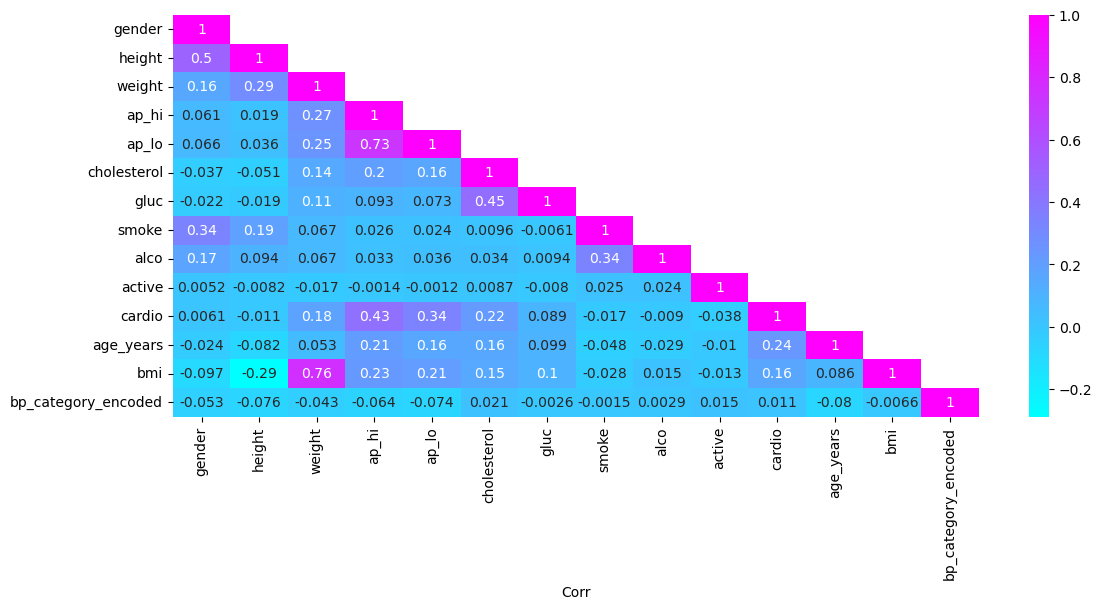

In [20]:
corr = df.corr()
matrix = np.triu(corr)
np.fill_diagonal(matrix, False)
figure = plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True,cmap=plt.cm.cool, mask=matrix)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

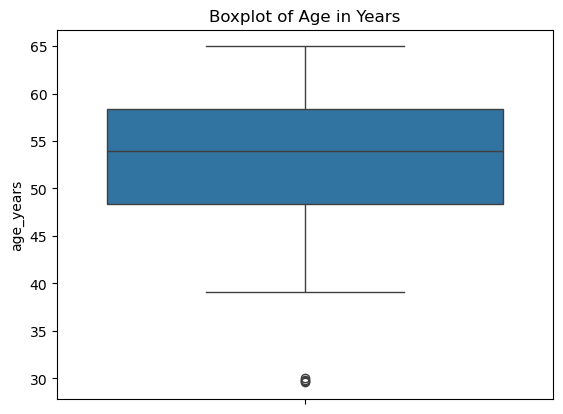

In [21]:
sns.boxplot(df['age_years'])
plt.title('Boxplot of Age in Years')
plt.show()

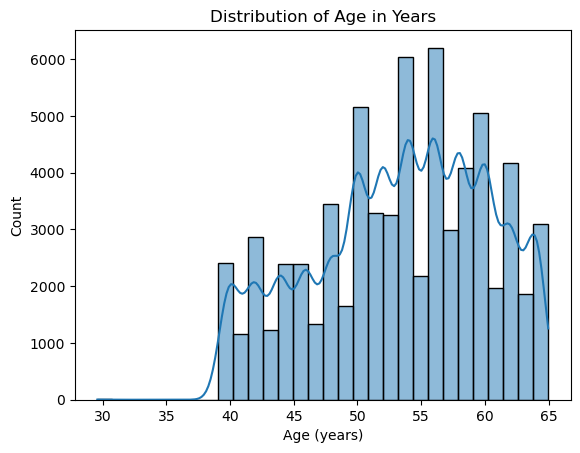

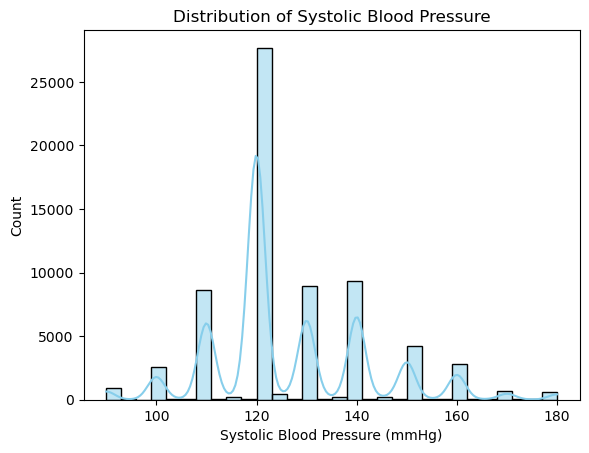

In [22]:
sns.histplot(df['age_years'], kde=True, bins=30)
plt.title('Distribution of Age in Years')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

sns.histplot(df['ap_hi'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.show()

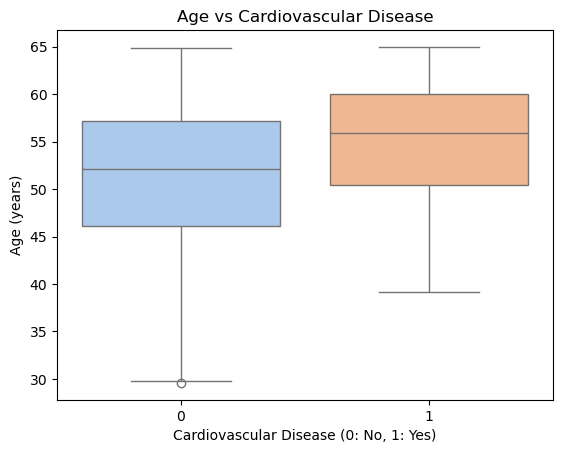

In [23]:
# Bivariate Analysis
sns.boxplot(x=df['cardio'], y=df['age_years'], palette='pastel', hue=df['cardio'], legend=False)
plt.title('Age vs Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
plt.ylabel('Age (years)')
plt.show()

## Modeling

In [24]:
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.20)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((54564, 13), (54564,), (13641, 13), (13641,))

In [26]:
y.value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [30]:
# normalizer = Normalizer()
# x_norm = normalizer.fit_transform(X)
# X_normalized = pd.DataFrame(x_norm, columns=X.columns)
# X_normalized

In [27]:
ADA = AdaBoostClassifier()
ET = ExtraTreesClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
SVM = SVC()
NB = GaussianNB()
KNN = KNeighborsClassifier()

In [32]:
# params = {"n_estimators" : [10, 50, 100, 500], 
#           "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1.0]}

# randomsearch = RandomizedSearchCV(ADA, param_distributions=params, n_jobs=-1, scoring=['accuracy', 'recall'], refit='accuracy', random_state=123)
# search = randomsearch.fit(X_train, y_train)
# search.best_params_


In [28]:
models = {'AdaBoost' : ADA,
          'ExtraTrees' : ET,
          'RandomForest' : RF,
          'GradientBoost' : GB,
          'SVM' : SVM,
          'Naive Bayes' : NB,
          'KNN' : KNN}

In [34]:
#rfe = RFE(estimator=SVM)
#rfe.fit(X_train, y_train)
#rfe.get_feature_names_out()

In [29]:
for key, item in models.items():
    print(key, item)

AdaBoost AdaBoostClassifier()
ExtraTrees ExtraTreesClassifier()
RandomForest RandomForestClassifier()
GradientBoost GradientBoostingClassifier()
SVM SVC()
Naive Bayes GaussianNB()
KNN KNeighborsClassifier()


In [30]:
feature_select = {}
selected_features = SelectPercentile(chi2, percentile=50).fit(X_train, y_train)

for key, item in tqdm(models.items()):
    
    if key in ["SVM" ,"Naive Bayes", "KNN"]:
        feature_select[key] = selected_features.get_feature_names_out()
        continue
    try:
        rfe = RFE(estimator=item)
        rfe.fit(X_train, y_train)
        feature_select[key] = rfe.get_feature_names_out()
    except Exception as e:
        print(e)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [05:13<00:00, 44.84s/it]


In [31]:
print("Select Percentile Feature Selection Results :\n",selected_features.get_feature_names_out())

Select Percentile Feature Selection Results :
 ['weight' 'ap_hi' 'ap_lo' 'cholesterol' 'age_years' 'bmi']


In [32]:
for key, item in feature_select.items():
    print(key, item)

AdaBoost ['weight' 'ap_hi' 'cholesterol' 'age_years' 'bmi' 'bp_category_encoded']
ExtraTrees ['height' 'weight' 'ap_hi' 'ap_lo' 'age_years' 'bmi']
RandomForest ['height' 'weight' 'ap_hi' 'ap_lo' 'age_years' 'bmi']
GradientBoost ['weight' 'ap_hi' 'ap_lo' 'cholesterol' 'age_years' 'bmi']
SVM ['weight' 'ap_hi' 'ap_lo' 'cholesterol' 'age_years' 'bmi']
Naive Bayes ['weight' 'ap_hi' 'ap_lo' 'cholesterol' 'age_years' 'bmi']
KNN ['weight' 'ap_hi' 'ap_lo' 'cholesterol' 'age_years' 'bmi']


In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, cohen_kappa_score,f1_score, confusion_matrix

def scores(y, preds):
    print("Accuracy Score is ",accuracy_score(y, preds))
    print("Recall Score is ",recall_score(y, preds, average='macro'))
    print("Precision Score is ",precision_score(y, preds, average='macro'))
    print("Cohen Kappa Score is ",cohen_kappa_score(y, preds))
    print("F1 Score is ",f1_score(y, preds, average='macro'))
    print("Confusion Matrix is \n",confusion_matrix(y, preds))
    
def evaluatemodel(model, feature_list, X, y):
    X_fs = X[feature_list]
    preds = cross_val_predict(model, X_fs, y, cv=5, n_jobs=-1)
    scores(y, preds)

In [35]:
for key, item in models.items():
    print(f"{key} Evaluation: \n")
    evaluatemodel(item, feature_select[key], X_train, y_train)
    print("\n-------------------------------")

AdaBoost Evaluation: 

Accuracy Score is  0.7266512719008871
Recall Score is  0.7258211197624687
Precision Score is  0.731685196743185
Cohen Kappa Score is  0.45236477486394844
F1 Score is  0.7246575797810264
Confusion Matrix is 
 [[22146  5429]
 [ 9486 17503]]

-------------------------------
ExtraTrees Evaluation: 

Accuracy Score is  0.6760501429513965
Recall Score is  0.6759887583225791
Precision Score is  0.6760091863348092
Cohen Kappa Score is  0.3519944234258694
F1 Score is  0.6759955916602618
Confusion Matrix is 
 [[18798  8777]
 [ 8899 18090]]

-------------------------------
RandomForest Evaluation: 

Accuracy Score is  0.6850304229895169
Recall Score is  0.6849255861837134
Precision Score is  0.6850063860282806
Cohen Kappa Score is  0.3699018517196624
F1 Score is  0.6849381069360299
Confusion Matrix is 
 [[19156  8419]
 [ 8767 18222]]

-------------------------------
GradientBoost Evaluation: 

Accuracy Score is  0.7324609632724873
Recall Score is  0.7320226221575715
Precisi

In [46]:
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import plot_model

In [107]:
ANN = Sequential()

# Input Layer
ANN.add(Input(shape=(13,)))

# First Hidden Layer
ANN.add(Dense(13, activation='relu'))
#ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

ANN.add(Dense(32, activation='relu'))
#ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

ANN.add(Dense(64, activation='relu'))
#ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

ANN.add(Dense(16, activation='relu'))
#ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

# Second Hidden Layer
ANN.add(Dense(4, activation='relu'))
#ANN.add(BatchNormalization())
ANN.add(Dropout(0.5))

# Output Layer, 1 Neuron with sigmoid for binary classification
ANN.add(Dense(1, activation='sigmoid'))

In [108]:
ANN.compile(optimizer="adam",loss="binary_crossentropy", metrics=['accuracy'])

In [109]:
ANN.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 13)                182       
                                                                 
 dropout_18 (Dropout)        (None, 13)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                448       
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 16)               

In [110]:
checkpoint = ModelCheckpoint(filepath='CVD_ANN-0.1.0',
                             monitor='val_loss',
                             save_best_only=True, 
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          patience=3)

callbacks = [checkpoint, earlystop]

In [111]:
X_temp, ANN_X_test, y_temp, ANN_y_test = train_test_split(X, y, test_size=0.15)
ANN_X_train, ANN_X_val, ANN_y_train, ANN_y_val = train_test_split(X_temp, y_temp, test_size=len(ANN_y_test))

In [112]:
print("Training Data Shape ", (ANN_X_train.shape, ANN_y_train.shape))
print("Testing Data Shape ", (ANN_X_test.shape, ANN_y_test.shape))
print("Validation Data Shape ", (ANN_X_val.shape, ANN_y_val.shape))

Training Data Shape  ((47743, 13), (47743,))
Testing Data Shape  ((10231, 13), (10231,))
Validation Data Shape  ((10231, 13), (10231,))


In [113]:
history = ANN.fit(x=ANN_X_train, 
                  y=ANN_y_train, 
                  batch_size=256,
                  epochs=20,
                  callbacks=callbacks, 
                  validation_data=(ANN_X_test, ANN_y_test))

Epoch 1/20
182/187 [============================>.] - ETA: 0s - loss: 1.7537 - accuracy: 0.5031
Epoch 1: val_loss improved from inf to 0.69346, saving model to CVD_ANN-0.1.0
INFO:tensorflow:Assets written to: CVD_ANN-0.1.0\assets
187/187 [==============================] - 5s 22ms/step - loss: 1.7301 - accuracy: 0.5029 - val_loss: 0.6935 - val_accuracy: 0.5004
Epoch 2/20
185/187 [============================>.] - ETA: 0s - loss: 0.7486 - accuracy: 0.5028
Epoch 2: val_loss improved from 0.69346 to 0.69339, saving model to CVD_ANN-0.1.0
INFO:tensorflow:Assets written to: CVD_ANN-0.1.0\assets
187/187 [==============================] - 4s 23ms/step - loss: 0.7482 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.5004
Epoch 3/20
187/187 [==============================] - ETA: 0s - loss: 0.7088 - accuracy: 0.5052
Epoch 3: val_loss improved from 0.69339 to 0.69328, saving model to CVD_ANN-0.1.0
INFO:tensorflow:Assets written to: CVD_ANN-0.1.0\assets
187/187 [=============================

In [120]:
gradientboost = GradientBoostingClassifier()
gradientboost.fit(X_train[feature_select["GradientBoost"]], y_train)
preds = gradientboost.predict(X_test[feature_select["GradientBoost"]])
scores(y_test, preds)

Accuracy Score is  0.7242137673191115
Recall Score is  0.7235043294546355
Precision Score is  0.7248306569822462
Cohen Kappa Score is  0.447543301113555
F1 Score is  0.723528757028495
Confusion Matrix is 
 [[5279 1679]
 [2083 4600]]


In [121]:
classes = ['Negative', 'Positive']

In [122]:
with open("CVDclasses.txt", "w") as f :
    f.write(str(classes)) 
    f.close() 

In [123]:
with open("CVDfeatures.txt", "w") as f :
    f.write(str(feature_select["GradientBoost"])) 
    f.close() 

In [124]:
import pickle

In [131]:
with open('GradientBoost-0.1.0.pkl', 'wb') as f:
    pickle.dump(gradientboost, f)

In [129]:
testing_data = X_test.copy()
testing_data = testing_data[feature_select["GradientBoost"]]
testing_data["Target"] = y_test 
testing_data

,weight,ap_hi,ap_lo,cholesterol,age_years,bmi,Target
32915,80.0,120,70,1,41.846575,27.041644,0
43684,77.0,120,80,2,49.734247,27.281746,1
63387,75.0,140,90,1,56.378082,29.296875,1
61073,50.0,108,73,1,51.832877,19.777699,0
38956,68.0,120,80,1,64.435616,23.808690,1
...,...,...,...,...,...,...,...
39237,110.0,140,90,3,59.986301,42.968750,1
54790,80.0,125,80,3,51.378082,31.250000,1
1932,70.0,120,90,1,44.054795,23.661439,0
15185,64.0,120,80,1,49.797260,22.675737,1


In [130]:
testing_data.to_csv("Testing Data.csv")